✅ Dataset cargado correctamente

   anio  precipitacion  produccion_agricola  energiapercapita
0  2005          15.50                  NaN              1.21
1  2006          14.32                  NaN              1.17
2  2007          17.30                  NaN              1.13
3  2008          64.00                  NaN              1.26
4  2009          18.26                  NaN              1.30

📍 Análisis de valores faltantes:

anio                    0
precipitacion           0
produccion_agricola    18
energiapercapita        0
dtype: int64

Porcentaje total de valores faltantes: 22.5%


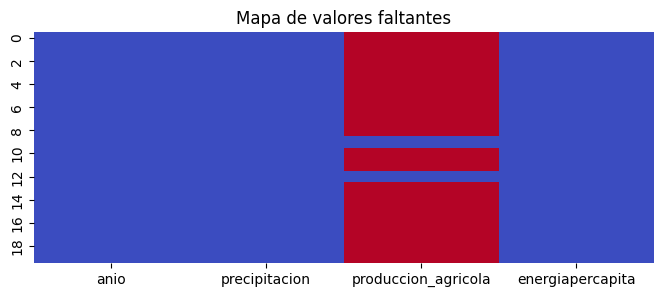


📍 Test de aleatoriedad de datos faltantes (Little’s MCAR simplificado):

Correlación entre patrones de missingness:
                      anio  precipitacion  produccion_agricola  \
anio                  NaN            NaN                  NaN   
precipitacion         NaN            NaN                  NaN   
produccion_agricola   NaN            NaN                  1.0   
energiapercapita      NaN            NaN                  NaN   

                     energiapercapita  
anio                              NaN  
precipitacion                     NaN  
produccion_agricola               NaN  
energiapercapita                  NaN  

⚠️ Posible patrón no aleatorio (No MCAR)

📍 Evaluación de consistencia temporal:

Diferencias entre años consecutivos:
 0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: anio, dtype: float64

✅ No se

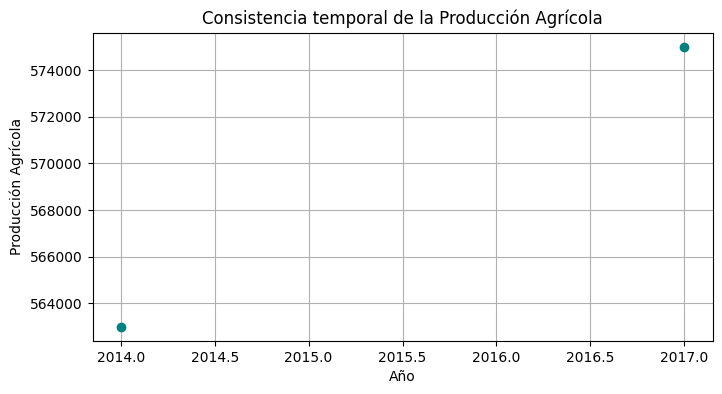


📋 Reporte resumido de calidad de datos:

Total de filas                                    20
Total de columnas                                  4
Valores faltantes totales                         18
Porcentaje de faltantes (%)                     22.5
Columnas con faltantes         [produccion_agricola]
Rango temporal                           2005 - 2024
Años faltantes en la serie                        []
dtype: object


In [1]:
# --- 1. Librerías necesarias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- 2. Carga del dataset ---
# Asegúrate de subir tu archivo primero (el original, con los datos reales)
# Ejemplo: produccion_agricola.csv
data = pd.read_csv('/content/Datos1 - Final.csv')

print("✅ Dataset cargado correctamente\n")
print(data.head())

# --- 3. Análisis de valores faltantes ---
print("\n📍 Análisis de valores faltantes:\n")
missing_summary = data.isna().sum()
print(missing_summary)
print(f"\nPorcentaje total de valores faltantes: {round(data.isna().sum().sum() / (len(data)*data.shape[1]) * 100, 2)}%")

# Visualización del patrón de missing values
plt.figure(figsize=(8,3))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title("Mapa de valores faltantes")
plt.show()

# --- 4. Test simplificado de aleatoriedad (Little’s MCAR aproximado) ---
print("\n📍 Test de aleatoriedad de datos faltantes (Little’s MCAR simplificado):\n")

# Matriz binaria de missing values
missing_matrix = data.isnull().astype(int)
corr_missing = missing_matrix.corr()

print("Correlación entre patrones de missingness:\n", corr_missing)

# Evaluación simplificada: si hay correlaciones fuertes (>0.5), los faltantes no son aleatorios
if (corr_missing.abs() > 0.5).any().any():
    print("\n⚠️ Posible patrón no aleatorio (No MCAR)")
else:
    print("\n✅ Los valores faltantes parecen MCAR (completamente al azar)")

# --- 5. Evaluación de consistencia temporal ---
print("\n📍 Evaluación de consistencia temporal:\n")

# Ordenar por año
data = data.sort_values('anio')

# Diferencia entre años consecutivos
diff = data['anio'].diff()
print("Diferencias entre años consecutivos:\n", diff)

# Detectar años faltantes en la serie
missing_years = [y for y in range(int(data['anio'].min()), int(data['anio'].max())+1)
                 if y not in data['anio'].values]

if missing_years:
    print(f"\n⚠️ Años faltantes en la serie temporal: {missing_years}")
else:
    print("\n✅ No se detectan años faltantes en la serie temporal.")

# Visualización de consistencia temporal
plt.figure(figsize=(8,4))
plt.plot(data['anio'], data['produccion_agricola'], marker='o', linestyle='-', color='teal')
plt.title("Consistencia temporal de la Producción Agrícola")
plt.xlabel("Año")
plt.ylabel("Producción Agrícola")
plt.grid(True)
plt.show()

# --- 6. Reporte resumido de calidad ---
def quality_summary(df):
    resumen = {
        'Total de filas': len(df),
        'Total de columnas': df.shape[1],
        'Valores faltantes totales': int(df.isna().sum().sum()),
        'Porcentaje de faltantes (%)': round(df.isna().sum().sum() / (len(df)*df.shape[1]) * 100, 2),
        'Columnas con faltantes': list(df.columns[df.isna().any()]),
        'Rango temporal': f"{int(df['anio'].min())} - {int(df['anio'].max())}",
        'Años faltantes en la serie': [y for y in range(int(df['anio'].min()), int(df['anio'].max())+1)
                                      if y not in df['anio'].values]
    }
    return pd.Series(resumen)

print("\n📋 Reporte resumido de calidad de datos:\n")
print(quality_summary(data))


In [2]:
# --- 7. Cálculo de Índice Global de Calidad de Datos ---

def calcular_calidad(df):
    total_celdas = df.shape[0] * df.shape[1]
    faltantes = df.isna().sum().sum()

    # Métrica 1: Completitud
    completitud = 1 - (faltantes / total_celdas)

    # Métrica 2: Duplicados
    duplicados = df.duplicated().sum()
    uniformidad = 1 - (duplicados / len(df))

    # Métrica 3: Consistencia básica (valores negativos donde no deberían)
    inconsistencias = ((df[['precipitacion', 'produccion_agricola', 'energiapercapita']] < 0).sum().sum())
    consistencia = 1 - (inconsistencias / (len(df)*3))

    # Índice final ponderado
    indice_calidad = (0.5 * completitud) + (0.3 * consistencia) + (0.2 * uniformidad)

    return {
        'Completitud (%)': round(completitud * 100, 2),
        'Consistencia (%)': round(consistencia * 100, 2),
        'Uniformidad (%)': round(uniformidad * 100, 2),
        'Índice Global de Calidad de Datos (%)': round(indice_calidad * 100, 2)
    }

print("\n📈 Evaluación del Índice Global de Calidad de Datos:\n")
calidad = calcular_calidad(data)
for k, v in calidad.items():
    print(f"{k}: {v}%")


📈 Evaluación del Índice Global de Calidad de Datos:

Completitud (%): 77.5%
Consistencia (%): 100.0%
Uniformidad (%): 100.0%
Índice Global de Calidad de Datos (%): 88.75%
